In [1]:
import cv2
import os
from tqdm import tqdm

In [2]:
import numpy as np
from random import shuffle

In [3]:
TRAIN_DIR=r'D:\ML\Safe Waters\Project-Safe-Waters-v1-master\IBM Machine Learning\10K_Model_Test\mine1'
#TEST_DIR=r'D:\ML\Safe Waters\Project-Safe-Waters-v1-master\IBM Machine Learning\10K_Model_Test\mine\Test'

In [4]:
IMG_SIZE=224
LR=1e-3

MODEL_NAME='safewaters-{}-{}.model'.format(LR,'2conv-basic')

In [5]:
file1 = open(r"D:\ML\Safe Waters\Project-Safe-Waters-v1-master\IBM Machine Learning\10K_Model_Test\Labels\grab_1000to9999.txt","r+")
s=file1.readlines()
#print(s[0])

In [6]:
def label_img(img,j):
    label1=s[j].split('-')[0]
    label2=s[j].split('-')[1]
    img1=img.split('.')[0]
    
    if(label1==img1):
        if (label2=='knee deep\n'):
            return(1)
        elif (label2=='waist deep\n'):
            return(2)
        elif (label2=='feet'):
            return(3)
        elif (label2=='dangerously deep\n'):
            return(4)
        else:
            return(0)

In [7]:
def create_train_data():
    training_data=[]
    k=0
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label=label_img(img,k)
        k=k+1
        path=os.path.join(TRAIN_DIR, img)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),[label]])
    shuffle(training_data)
    return training_data

In [8]:
train_data=create_train_data()

100%|█████████████████████████████████████████████████████████████████████████████| 9000/9000 [00:12<00:00, 703.20it/s]


In [9]:
np.array(train_data).shape

(9000, 2)

In [10]:
x=[]
y=[]
for i in range(len(train_data)):
    x.append(train_data[i][0])
    y.append(train_data[i][1])

In [11]:
x=np.array(x)
y=np.array(y)

In [12]:
x.shape

(9000, 224, 224)

In [ ]:
xx=[]
for i in range(len(x)):
    xx.append(list(x[i].flatten()))

In [ ]:
xx=np.array(xx)
xx.shape

In [ ]:
from sklearn.model_selection import train_test_split

In [75]:
xtrain,xtest,ytrain,ytest=train_test_split(xx,y)

In [76]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(675, 50176) (675, 1) (225, 50176) (225, 1)


In [77]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain /= 255
xtest /= 255
print('xtrain shape:', xtrain.shape)
print('ytrain shape:', ytrain.shape)
print(xtrain.shape[0], 'train samples')
print(xtest.shape[0], 'test samples')

xtrain shape: (675, 50176)
ytrain shape: (675, 1)
675 train samples
225 test samples


In [78]:
import tensorflow as tf

In [79]:
xtrain=tf.keras.utils.normalize(xtrain,axis=1)
xtest=tf.keras.utils.normalize(xtest,axis=1)

In [80]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [81]:
model.compile(optimizer= 'adam' , loss= 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [82]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(xtrain, ytrain, epochs=10, 
                    validation_data=(xtest,ytest))

Train on 675 samples, validate on 225 samples
Epoch 1/10
675/675 [==============================] - ETA: 8s - loss: 2.3032 - acc: 0.0000e+0 - ETA: 4s - loss: 2.2680 - acc: 0.1719    - ETA: 3s - loss: 2.2089 - acc: 0.229 - ETA: 2s - loss: 2.1460 - acc: 0.218 - ETA: 2s - loss: 2.0968 - acc: 0.212 - ETA: 1s - loss: 2.0565 - acc: 0.218 - ETA: 1s - loss: 1.9980 - acc: 0.218 - ETA: 1s - loss: 1.9409 - acc: 0.226 - ETA: 1s - loss: 1.8583 - acc: 0.253 - ETA: 1s - loss: 1.8147 - acc: 0.256 - ETA: 0s - loss: 1.7680 - acc: 0.258 - ETA: 0s - loss: 1.7583 - acc: 0.260 - ETA: 0s - loss: 1.7245 - acc: 0.264 - ETA: 0s - loss: 1.6535 - acc: 0.287 - ETA: 0s - loss: 1.6432 - acc: 0.279 - ETA: 0s - loss: 1.6238 - acc: 0.283 - ETA: 0s - loss: 1.6037 - acc: 0.289 - ETA: 0s - loss: 1.5825 - acc: 0.296 - ETA: 0s - loss: 1.5728 - acc: 0.298 - ETA: 0s - loss: 1.5609 - acc: 0.294 - 2s 3ms/sample - loss: 1.5593 - acc: 0.2948 - val_loss: 1.2602 - val_acc: 0.2756
Epoch 2/10
675/675 [==============================] 

In [ ]:
#history=model.fit(xtrain,ytrain,epochs=50)

In [83]:
val_loss, val_acc=model.evaluate(xtest,ytest)

225/225 [==============================] - ETA: 0s - loss: 1.3053 - acc: 0.375 - ETA: 0s - loss: 1.3480 - acc: 0.443 - 0s 528us/sample - loss: 1.3448 - acc: 0.4311


In [84]:
print(val_loss,val_acc)

1.3447686936457952 0.4311111


In [85]:
pred=model.predict([xtest])

In [94]:
print(np.argmax(pred[15]))

3


In [95]:
ytest[15]

array([2])

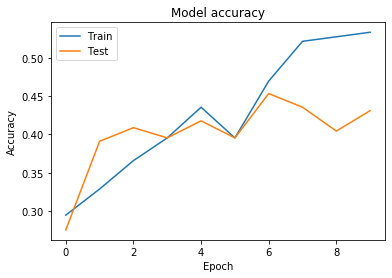

In [96]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

225/225 - 0s - loss: 1.3448 - acc: 0.4311


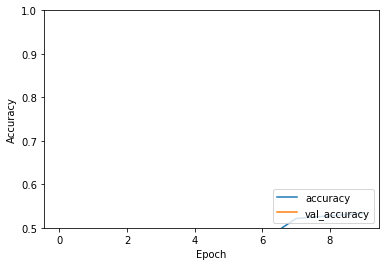

In [97]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(xtest, ytest, verbose=2)

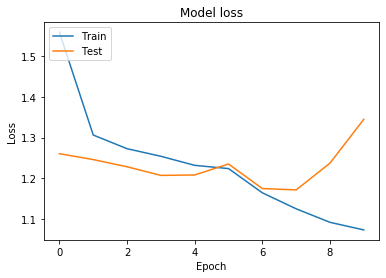

In [98]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [84]:
a=np.array([[[4,6,7,8],[3,7,9,10]],
            [[7,8,9,12],[3,9,0,2]]])
#a.transpose(2,0,1).reshape(3,-1)
#b=a.reshape(4,3)
#b=b.transpose()
print(a.shape)

(2, 2, 4)


In [48]:
new_img = img.reshape((img.shape[0]*img.shape[1]), img.shape[2])
new_img = new_img.transpose()

In [114]:
a=np.array([[[1,2],[2,3]],
           [[3,4],[5,6]]])

In [116]:
b=[]
for i in range(len(a)):
    b.append(list(a[i].flatten()))
print(b)

[[1, 2, 2, 3], [3, 4, 5, 6]]
